<a href="https://colab.research.google.com/github/ttu1984wei/AI_practice/blob/main/DNN_%E5%81%9A%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98_MNSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from keras.layers import Dropout
from ipywidgets import interact_manual
from google.colab import drive

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


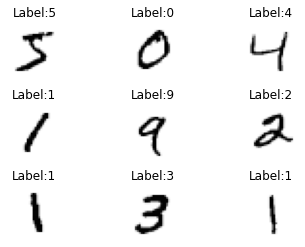

In [6]:
sub_plot = 330
for i in range(0, 9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(x_train[i], cmap = 'Greys')
    ax.set_title('Label:' + str(y_train[i]))
    ax.axis('off')
    
plt.subplots_adjust(hspace = .5)#顯示數字圖片
plt.show()

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32')#轉成一維向量
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32')#轉成一維向量

In [8]:
print(x_train.shape)

(60000, 784)


In [9]:
#正規化，讓數字介於[0,1]之間
x_train = x_train / 255
x_test = x_test / 255

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
# 定義模型
model = Sequential()
model.add(Dense(256, input_dim=28*28, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 384,854
Trainable params: 384,854
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 編譯模型
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), 
              metrics=['accuracy'])

In [13]:
#訓練模型
history = model.fit(x_train, y_train, validation_split=0.2, 
                    epochs=20, batch_size=128, verbose=2)

Epoch 1/20
375/375 - 3s - loss: 0.0870 - accuracy: 0.2679 - val_loss: 0.0819 - val_accuracy: 0.4475 - 3s/epoch - 9ms/step
Epoch 2/20
375/375 - 3s - loss: 0.0721 - accuracy: 0.5971 - val_loss: 0.0572 - val_accuracy: 0.7197 - 3s/epoch - 8ms/step
Epoch 3/20
375/375 - 3s - loss: 0.0440 - accuracy: 0.7693 - val_loss: 0.0311 - val_accuracy: 0.8403 - 3s/epoch - 8ms/step
Epoch 4/20
375/375 - 3s - loss: 0.0280 - accuracy: 0.8444 - val_loss: 0.0222 - val_accuracy: 0.8716 - 3s/epoch - 8ms/step
Epoch 5/20
375/375 - 3s - loss: 0.0220 - accuracy: 0.8698 - val_loss: 0.0185 - val_accuracy: 0.8896 - 3s/epoch - 8ms/step
Epoch 6/20
375/375 - 3s - loss: 0.0190 - accuracy: 0.8846 - val_loss: 0.0165 - val_accuracy: 0.8973 - 3s/epoch - 8ms/step
Epoch 7/20
375/375 - 3s - loss: 0.0172 - accuracy: 0.8944 - val_loss: 0.0153 - val_accuracy: 0.9050 - 3s/epoch - 8ms/step
Epoch 8/20
375/375 - 3s - loss: 0.0160 - accuracy: 0.8999 - val_loss: 0.0143 - val_accuracy: 0.9105 - 3s/epoch - 8ms/step
Epoch 9/20
375/375 - 3s 

In [14]:
#評估模型
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0102 - accuracy: 0.9357
0.010169978253543377
0.935699999332428


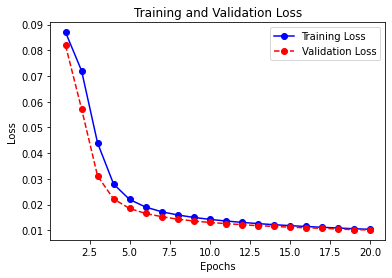

In [15]:
#顯示訓練和驗證損失
loss = history.history['loss']
epochs = range(1, len(loss)+1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, "bo-", label='Training Loss')
plt.plot(epochs, val_loss, "ro--", label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

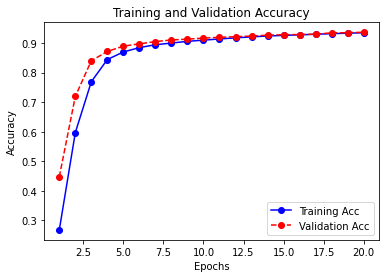

In [16]:
#顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

In [18]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', y_predict[測試編號])

In [19]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

In [20]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [22]:
model.save('my_dnn_model')

INFO:tensorflow:Assets written to: my_dnn_model/assets
